# Iris Flower Dataset
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

Content
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

#model selection and evaluation
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.preprocessing import LabelEncoder


# Model libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [2]:
df = pd.read_csv('IRIS.csv')


In [3]:
df.shape

(150, 5)

Data preprocessing

In [4]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [5]:
dataoveriew(df, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 150

Number of features: 5

Features:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Missing values: 0

Unique values:
sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64


In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


checking the missing values

In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

# Distribution of feature and target 

<AxesSubplot:xlabel='species', ylabel='count'>

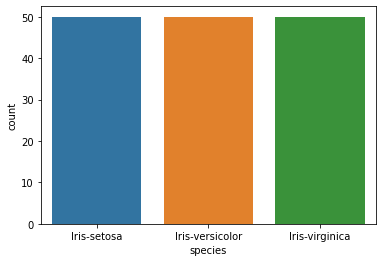

In [11]:
sns.countplot(df['species'])

Text(0.5, 0.98, 'sepal_length')

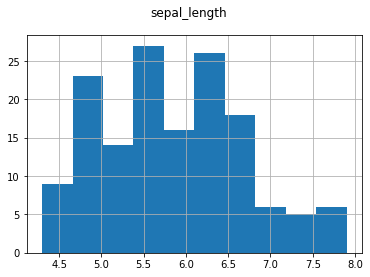

In [12]:
col = "sepal_length"
df[col].hist()
plt.suptitle(col)

Text(0.5, 0.98, 'sepal_width')

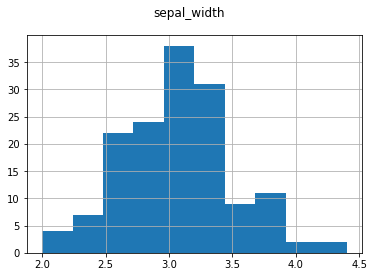

In [13]:
col = "sepal_width"
df[col].hist()
plt.suptitle(col)

Text(0.5, 0.98, 'petal_length')

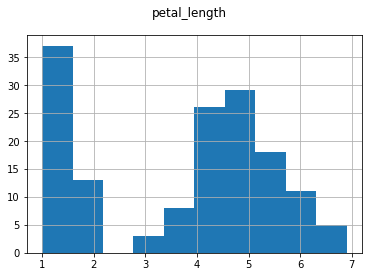

In [14]:
col = "petal_length"
df[col].hist()
plt.suptitle(col)

Text(0.5, 0.98, 'petal_width')

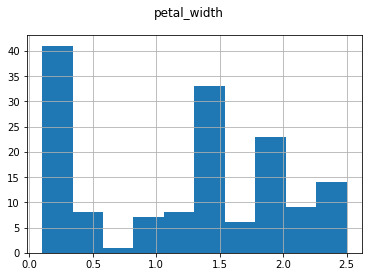

In [15]:
col = "petal_width"
df[col].hist()
plt.suptitle(col)

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

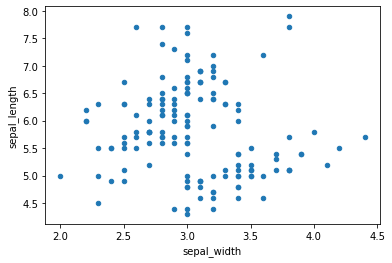

In [16]:
df.plot(kind= 'scatter',x ='sepal_width',y='sepal_length'  )

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

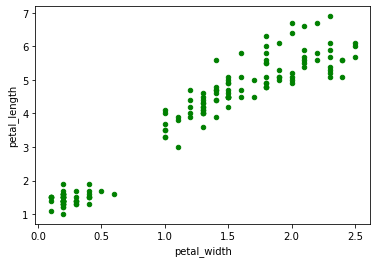

In [17]:
df.plot(kind= 'scatter',x ='petal_width',y='petal_length' ,color='green' )

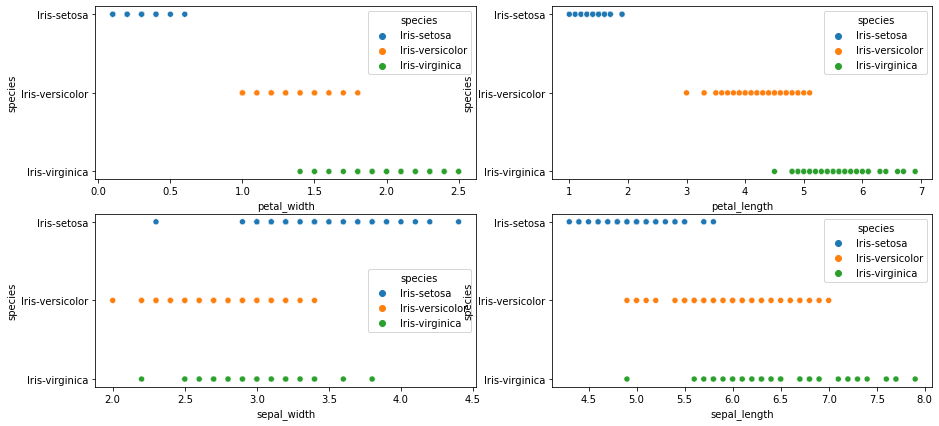

In [18]:
fig, ax= plt.subplots(figsize=(15,7), ncols=2, nrows=2)
sns.scatterplot(x="petal_width", y="species",data=df, hue="species", ax=ax[0][0])
sns.scatterplot(x="petal_length", y="species",data=df, hue="species", ax=ax[0][1])
sns.scatterplot(x="sepal_width", y="species",data=df,hue="species" , ax=ax[1][0])
sns.scatterplot(x="sepal_length", y="species",data=df,hue="species" , ax=ax[1][1])

plt.show();

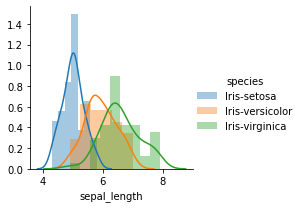

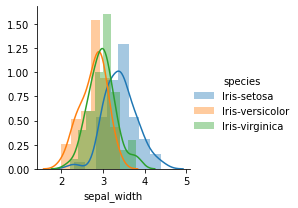

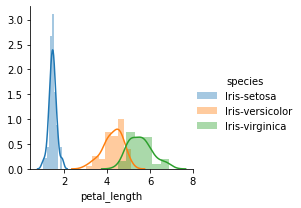

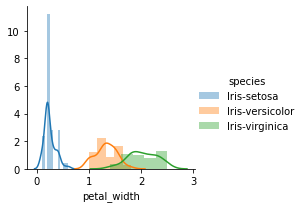

In [19]:
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,'sepal_length').add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"sepal_width").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()

plt.show()

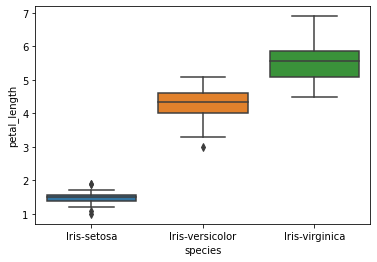

In [20]:
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()

# (EDA) - Pairplots

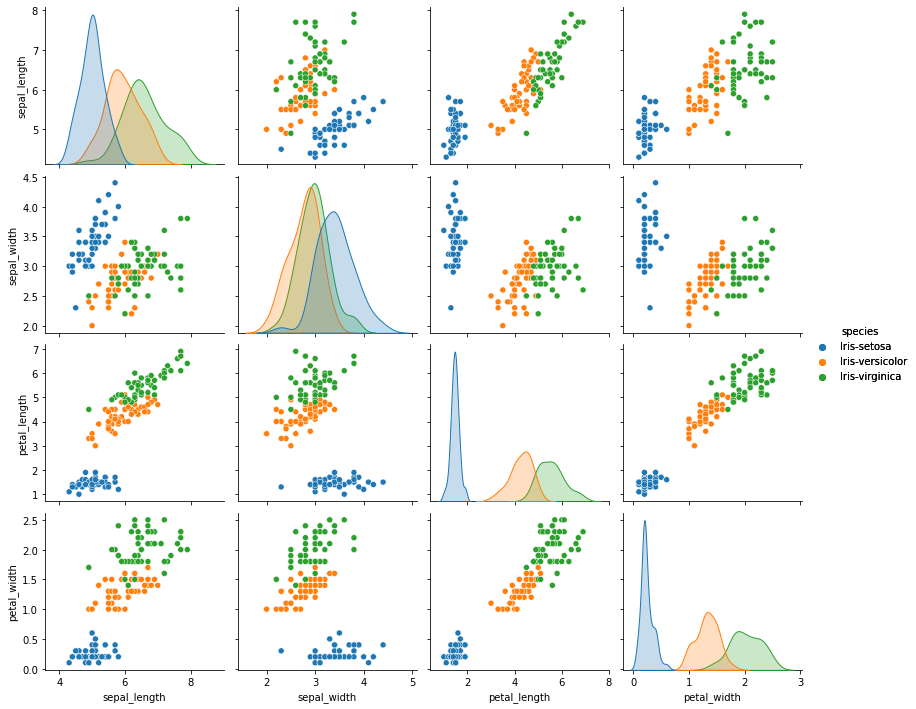

In [21]:
sns.pairplot(df,hue='species').add_legend()

# correlation

In [22]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [ ]:
catagoric_features = df.select_dtypes(include=[np.object])
catagoric_features.columns

In [24]:
df['target'] = df['species'].map({"Iris-setosa":0,'Iris-versicolor':1,'Iris-virginica':2})

In [25]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [26]:
correlation = numeric_features.corr()
print(correlation['target'].sort_values(ascending = False),'\n')

target          1.000000
petal_width     0.956464
petal_length    0.949043
sepal_length    0.782561
sepal_width    -0.419446
Name: target, dtype: float64 



Text(0.5, 1, 'correlation of features ')

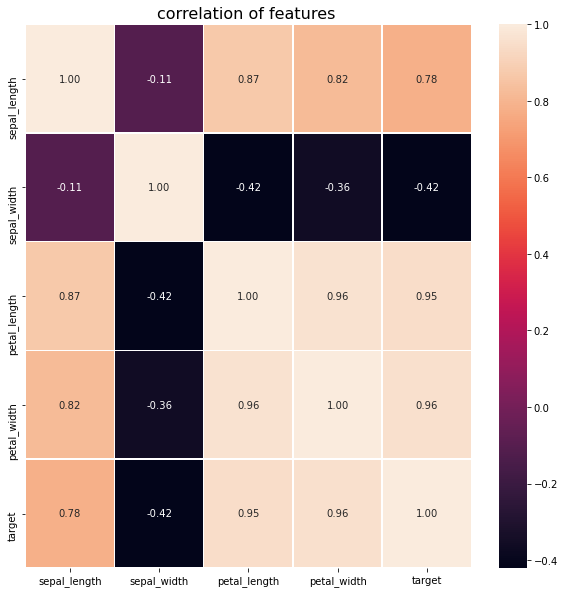

In [27]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation,annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.title("correlation of features ",y =1 , size = 16)

# Enocding the target column

In [28]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
df[column] = LabelEncoder().fit_transform(df[column])

In [29]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
target            int64
dtype: object

In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


# train - test - split

In [31]:
#removing bad features(multicollinear[heatmap],feature with poor correlation , missing values)
removed_cols = ['target','species']

In [32]:
model = []
score = []
x_train, x_test, y_train, y_test = train_test_split(df.drop(removed_cols,axis=1),df["species"],test_size=0.2,random_state=42)
print("X Train Shape", x_train.shape)
print("Y Train Shape", y_train.shape)
print("X Test Shape", x_test.shape)
print("Y Test Shape", y_test.shape)

X Train Shape (120, 4)
Y Train Shape (120,)
X Test Shape (30, 4)
Y Test Shape (30,)


# Building models

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Instantiate the models
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()

# Fit the models
knn_model.fit(x_train, y_train)
logreg_model.fit(x_train, y_train)
dt_model.fit(x_train, y_train)

# Make predictions
knn_preds = knn_model.predict(x_test)
logreg_preds = logreg_model.predict(x_test)
dt_preds = dt_model.predict(x_test)

# Calculate accuracy scores
knn_accuracy = accuracy_score(y_test, knn_preds)
logreg_accuracy = accuracy_score(y_test, logreg_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)

# Generate classification reports
knn_report = classification_report(y_test, knn_preds)
logreg_report = classification_report(y_test, logreg_preds)
dt_report = classification_report(y_test, dt_preds)

# Print the results
print("K-Nearest Neighbors:")
print("Accuracy:", knn_accuracy)
print("Classification Report:\n", knn_report)
print("==================================")

print("Logistic Regression:")
print("Accuracy:", logreg_accuracy)
print("Classification Report:\n", logreg_report)
print("==================================")

print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Classification Report:\n", dt_report)
print("==================================")

K-Nearest Neighbors:
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Logistic Regression:
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Decision Tree:
Accuracy: 1.0
Classification Report:
                  precisio

In [33]:
k_range =list(range(1,12))
acc = []
for i in k_range :
    knn=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred= knn.predict(x_test)
    acc.append(metrics.accuracy_score(y_test,y_pred))
    print("The knn model with ", i , " K value Has a prediction score of", metrics.accuracy_score(y_test,y_pred) , "% accuracy score")

The knn model with  1  K value Has a prediction score of 1.0 % accuracy score
The knn model with  2  K value Has a prediction score of 1.0 % accuracy score
The knn model with  3  K value Has a prediction score of 1.0 % accuracy score
The knn model with  4  K value Has a prediction score of 1.0 % accuracy score
The knn model with  5  K value Has a prediction score of 1.0 % accuracy score
The knn model with  6  K value Has a prediction score of 1.0 % accuracy score
The knn model with  7  K value Has a prediction score of 0.9666666666666667 % accuracy score
The knn model with  8  K value Has a prediction score of 1.0 % accuracy score
The knn model with  9  K value Has a prediction score of 1.0 % accuracy score
The knn model with  10  K value Has a prediction score of 1.0 % accuracy score
The knn model with  11  K value Has a prediction score of 1.0 % accuracy score
